<a href="https://colab.research.google.com/github/kunal1709/ksharm11_MachineLearning/blob/master/Assignment_1_AdvanceML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Networks Model Hypertuning**

# **Kunal Sharma**

**October 2021**

The library tensorflow.keras.datasets is used fo the to load the IMDB Dataset in the workspace. The top most occuring words are considered for our deep learning model.


In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import matplotlib.pyplot as plt

The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension) and Sets specific indices of results[i] to 1s.

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Vectorized the Train and Test data.

In [3]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

From the Train data 40 % of data is allocated from Validation data.

In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Model definition**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Training your model**

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

30/30 [==============================] - 1s 36ms/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.6914 - val_accuracy: 0.8676
Epoch 20/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.7617 - val_accuracy: 0.8555


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss and Plotting the training and validation accuracy**

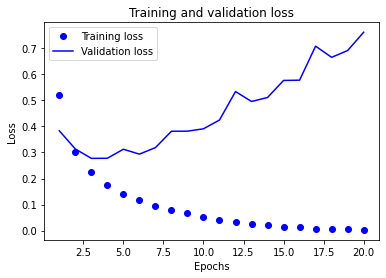

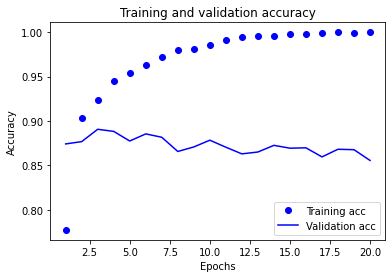

In [12]:

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model from scratch

In [13]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4614 - accuracy: 0.8206
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2686 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2037 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8847


In [14]:
results

[0.289805144071579, 0.8846799731254578]

In [15]:
model.predict(x_test)

array([[0.22185287],
       [0.9996874 ],
       [0.9485225 ],
       ...,
       [0.1378907 ],
       [0.08716184],
       [0.59406245]], dtype=float32)

Model-2

In [16]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model2.evaluate(x_test, y_test)


Epoch 1/5
49/49 [==============================] - 2s 29ms/step - loss: 0.4434 - accuracy: 0.8164
Epoch 2/5
49/49 [==============================] - 1s 29ms/step - loss: 0.2535 - accuracy: 0.9100
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 0.1963 - accuracy: 0.9306
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1633 - accuracy: 0.9422
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3155 - accuracy: 0.8796


In [17]:
results

[0.3155460059642792, 0.8795599937438965]

Model 3

In [18]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

30/30 [==============================] - 1s 36ms/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 0.6717 - val_accuracy: 0.8683
Epoch 19/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.6954 - val_accuracy: 0.8661
Epoch 20/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.7210 - val_accuracy: 0.8642


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting

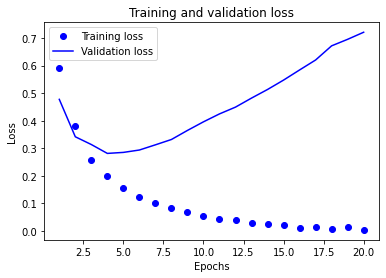

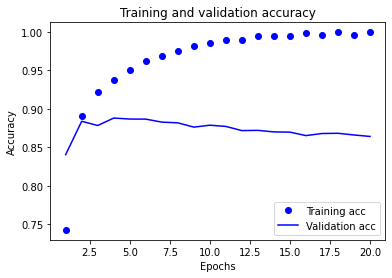

In [19]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model3.fit(x_train, y_train, epochs=1, batch_size=512)
results_M3 = model.evaluate(x_test, y_test)
results_M3

782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8847


[0.289805144071579, 0.8846799731254578]

# **Units Hypertuning**

Model 4

In [ ]:
model4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

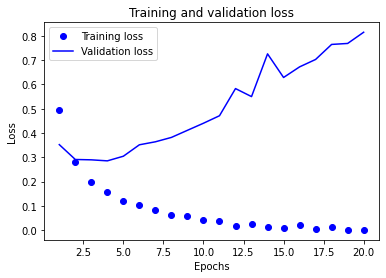

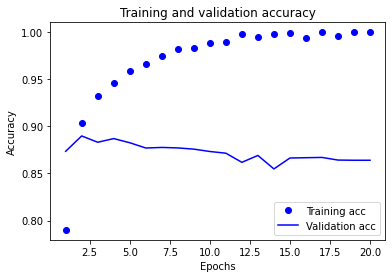

In [59]:
import matplotlib.pyplot as plt
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model4.fit(x_train, y_train, epochs=8, batch_size=512)
results_M4 = model4.evaluate(x_test, y_test)
results_M4

Epoch 1/8
49/49 [==============================] - 2s 36ms/step - loss: 0.2599 - accuracy: 0.9440
Epoch 2/8
49/49 [==============================] - 2s 35ms/step - loss: 0.1286 - accuracy: 0.9616
Epoch 3/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0933 - accuracy: 0.9717
Epoch 4/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/8
49/49 [==============================] - 2s 35ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 6/8
49/49 [==============================] - 2s 35ms/step - loss: 0.0322 - accuracy: 0.9909
Epoch 7/8
49/49 [==============================] - 2s 36ms/step - loss: 0.0223 - accuracy: 0.9944
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.8034 - accuracy: 0.8534


[0.8034347891807556, 0.8533999919891357]

Model 5

In [ ]:
model5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict5 = history5.history
history_dict5.keys()

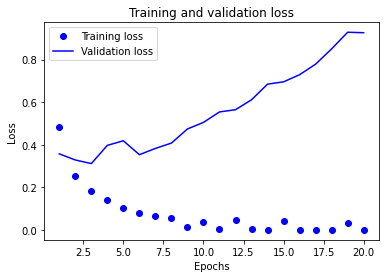

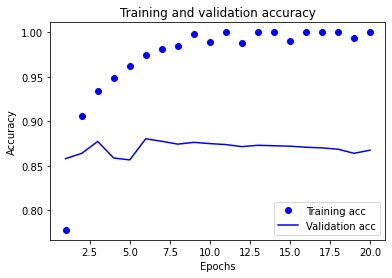

In [11]:
import matplotlib.pyplot as plt
loss_values = history_dict5["loss"]
val_loss_values = history_dict5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict5["accuracy"]
val_acc = history_dict5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
model5.fit(x_train, y_train, epochs=3, batch_size=512)
results_M5 = model5.evaluate(x_test, y_test)
results_M5

Epoch 1/3
49/49 [==============================] - 2s 46ms/step - loss: 0.0152 - accuracy: 0.9969
Epoch 2/3
49/49 [==============================] - 2s 44ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 1.2393 - accuracy: 0.8472


[1.2392771244049072, 0.8471999764442444]

Model 6

In [ ]:
model6 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model6.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history6 = model6.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict6 = history6.history
history_dict6.keys()

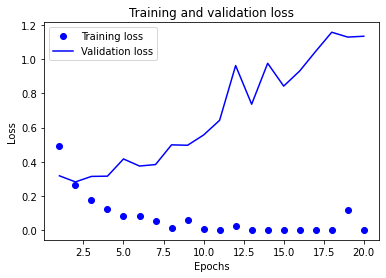

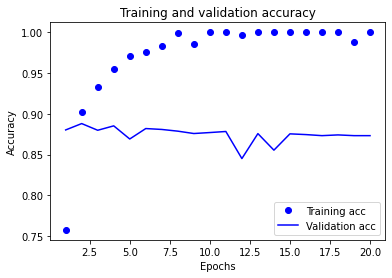

In [16]:
import matplotlib.pyplot as plt
loss_values = history_dict6["loss"]
val_loss_values = history_dict6["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict6["accuracy"]
val_acc = history_dict6["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
model6.fit(x_train, y_train, epochs=2, batch_size=512)
results_M6 = model6.evaluate(x_test, y_test)
results_M6

Epoch 1/2
49/49 [==============================] - 4s 75ms/step - loss: 0.0160 - accuracy: 0.9962
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.7804 - accuracy: 0.8670


[0.7803609371185303, 0.8669999837875366]

# **Loss Function**

Model 7:
Model Loss - MSE


In [ ]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

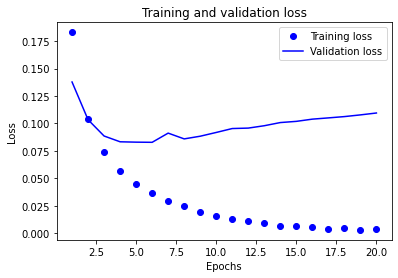

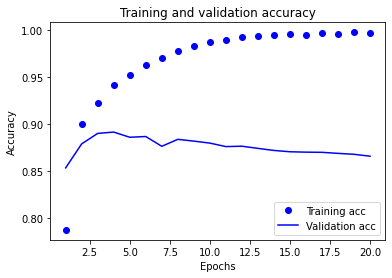

In [7]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model_MSE.fit(x_train, y_train, epochs=4, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/4
49/49 [==============================] - 1s 29ms/step - loss: 0.0272 - accuracy: 0.9700
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0227 - accuracy: 0.9758
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0197 - accuracy: 0.9798
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.1213 - accuracy: 0.8549


[0.12134084850549698, 0.8549200296401978]

# **Activation Function**
Model Activation function - tanh

In [10]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

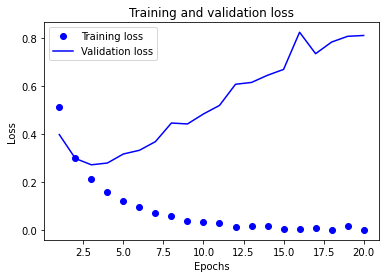

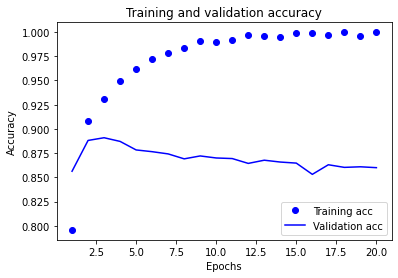

In [11]:
import matplotlib.pyplot as plt
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [14]:
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/3
49/49 [==============================] - 1s 29ms/step - loss: 0.1156 - accuracy: 0.9666
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.0959 - accuracy: 0.9721
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.5788 - accuracy: 0.8458


[0.5788284540176392, 0.8457599878311157]

# **Regularisation**
Model Regularizer - L2


In [ ]:
from tensorflow.keras import regularizers
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_reg = model_reg.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_reg = history_model_reg.history
history_dict_reg.keys()

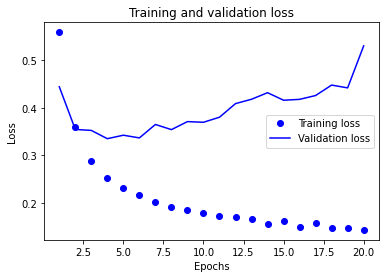

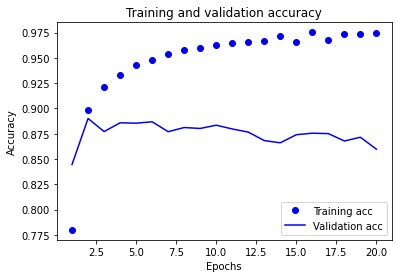

In [17]:
import matplotlib.pyplot as plt
loss_values = history_dict_reg["loss"]
val_loss_values = history_dict_reg["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_reg["accuracy"]
val_acc = history_dict_reg["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
model_reg.fit(x_train, y_train, epochs=4, batch_size=512)
results_reg = model_reg.evaluate(x_test, y_test)
results_reg


Epoch 1/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1982 - accuracy: 0.9492
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1892 - accuracy: 0.9528
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1896 - accuracy: 0.9522
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.4274 - accuracy: 0.8695


[0.4273843765258789, 0.8695200085639954]

# **Dropout**
Model Droupout - 0.5


In [20]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

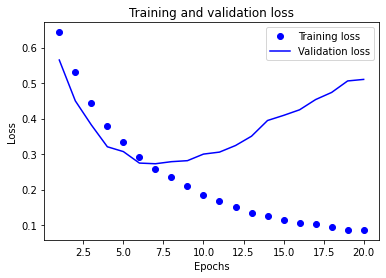

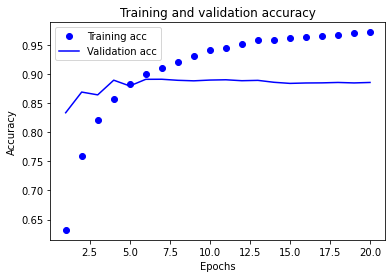

In [21]:
import matplotlib.pyplot as plt
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [23]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

49/49 [==============================] - 2s 32ms/step - loss: 0.1341 - accuracy: 0.9555
Epoch 6/8
49/49 [==============================] - 2s 31ms/step - loss: 0.1311 - accuracy: 0.9567
Epoch 7/8
49/49 [==============================] - 2s 32ms/step - loss: 0.1253 - accuracy: 0.9581
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.8714


[0.5674294829368591, 0.871399998664856]

# **Final Model with Hypertunned Parameters**

In [24]:
from tensorflow.keras import regularizers
model_Final = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Final.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Final = model_Final.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Final = history_model_Final.history
history_dict_Final.keys()

30/30 [==============================] - 1s 45ms/step - loss: 0.0425 - accuracy: 0.9650 - val_loss: 0.1104 - val_accuracy: 0.8816
Epoch 15/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0434 - accuracy: 0.9620 - val_loss: 0.1146 - val_accuracy: 0.8777
Epoch 16/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0410 - accuracy: 0.9662 - val_loss: 0.1164 - val_accuracy: 0.8764
Epoch 17/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0397 - accuracy: 0.9667 - val_loss: 0.1121 - val_accuracy: 0.8782
Epoch 18/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0418 - accuracy: 0.9635 - val_loss: 0.1137 - val_accuracy: 0.8797
Epoch 19/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0403 - accuracy: 0.9654 - val_loss: 0.1107 - val_accuracy: 0.8809
Epoch 20/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0389 - accuracy: 0.9672 - val_loss: 0.1155 - val_accuracy: 0.8785


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

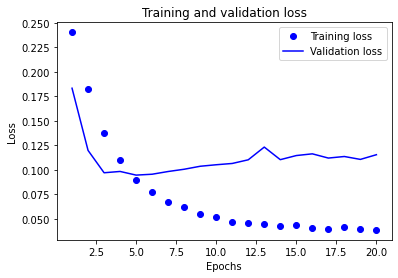

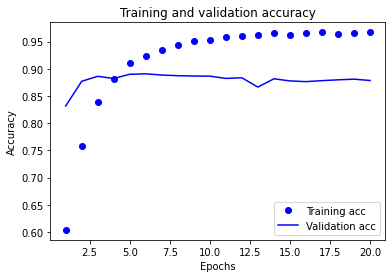

In [25]:
import matplotlib.pyplot as plt
loss_values = history_dict_Final["loss"]
val_loss_values = history_dict_Final["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history_dict_Final["accuracy"]
val_acc = history_dict_Final["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
model_Final.fit(x_train, y_train, epochs=3, batch_size=512)
results_Final = model_Final.evaluate(x_test, y_test)
results_Final

Epoch 1/3
49/49 [==============================] - 2s 37ms/step - loss: 0.0529 - accuracy: 0.9485
Epoch 2/3
49/49 [==============================] - 2s 37ms/step - loss: 0.0528 - accuracy: 0.9477
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.1153 - accuracy: 0.8741


[0.11526432633399963, 0.8740800023078918]

# **Summary OF all the Models**

In [51]:
All_Loss= np.array([results_Dropout[0],results_Final[0],results_MSE[0],results_reg[0],results_tanh[0]])*100
All_Loss
All_Accuracy= np.array([results_Dropout[1],results_Final[1],results_MSE[1],results_reg[1],results_tanh[1]])*100
All_Accuracy
Labels=['Model_Dropout','Model_Final','Model_MSE','model_reg','model_tanh']

plt.clf()


<Figure size 432x288 with 0 Axes>

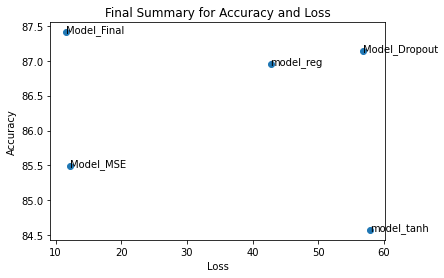

In [57]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Final Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

# **Final Comments**




### We can see the Maximun accuracy and Loss was with model_Final. We used 3 dense layers (32,32,16) with droup out rate of 0.5 for each. For loss we use MSE as compared the model_MSE loss with any other model(other than Final Hypertuned Model) We see that the Loss is minimal with MSE.

# **Summary**

###A hyperparameter tuning is a parameter whose value is used to control the learning process. The above observation shows, the variations in the performance measure while hyper tuning.

###•	**Units**: The increase in the unit from 8, 16, 32, 64, 128, we could see that there is very minimal change in the accuracy whereas the loss function decreases. Also, the epoch values are generated at the early cycle as units increase.

###•	**Hidden Layers**: The increase in the number of hidden layers from 1 to 3, we observed there is no change in accuracy and deflection in the loss function.

###•	**Loss Function**: Using “mse” as loss function for IMDB dataset, loss value is low when compared to binary cross entropy.

###•	**Activation Function**: The accuracy of tanh activation function for the model is low and degrades the performance due to vanishing gradient problem.

###•	**Regularization**: Regularization gives a significantly lower loss with less overfitting compared to initial model and accuracy the L-2 model showing slightly better accuracy.

###•	**Dropout**: The dropout also helps gain a lower loss function but does not affect accuracy.
